In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # to ignore any warning if it comes

In [16]:
data = pd.read_csv("C:\Data_Science\Jigsaw Academy\dataFiles\ML\data_files\movgavg.txt", index_col='Date')

In [17]:
data.head(2)

Unnamed: 0   Price  10-day SMA  10-day WMA  \
Date                                                    
24-Mar-10           1  22.273         NaN         NaN   
25-Mar-10           2  22.194         NaN         NaN   

           Smoothing Constant 2/(10 + 1)  10-day EMA  
Date                                                  
24-Mar-10                            NaN         NaN  
25-Mar-10                            NaN         NaN

In [18]:
data.index = pd.to_datetime(data.index)
# we can drop the old index column:
data = data.drop(columns=['Unnamed: 0','10-day SMA','10-day WMA','Smoothing Constant 2/(10 + 1)','10-day EMA'])
# removing the unwanted columns

In [19]:
data.head(4)

Price
Date              
2010-03-24  22.273
2010-03-25  22.194
2010-03-26  22.085
2010-03-29  22.174

* time series just deals with data and the target column and not with the other columns and so all the other columns are dropped as shown above

* we can also use 'parse-dates' method in order to convert the date which is in the String format into the Date format

* always remember to make the Date column as the index column - this is a very important step

### Simple Moving Average - 

In [20]:
sma10 = data['Price'].rolling(10).mean()

In [21]:
data['10-day SMA'] = sma10
data

Price  10-day SMA
Date                          
2010-03-24  22.273         NaN
2010-03-25  22.194         NaN
2010-03-26  22.085         NaN
2010-03-29  22.174         NaN
2010-03-30  22.184         NaN
2010-03-31  22.134         NaN
2010-04-01  22.234         NaN
2010-04-05  22.432         NaN
2010-04-06  22.244         NaN
2010-04-07  22.293     22.2247
2010-04-08  22.154     22.2128
2010-04-09  22.393     22.2327
2010-04-12  22.382     22.2624
2010-04-13  22.611     22.3061
2010-04-14  23.356     22.4233
2010-04-15  24.052     22.6151
2010-04-16  23.753     22.7670
2010-04-19  23.832     22.9070
2010-04-20  23.952     23.0778
2010-04-21  23.634     23.2119
2010-04-22  23.823     23.3788
2010-04-23  23.872     23.5267
2010-04-26  23.654     23.6539
2010-04-27  23.187     23.7115
2010-04-28  23.098     23.6857
2010-04-29  23.326     23.6131
2010-04-30  22.681     23.5059
2010-05-03  23.098     23.4325
2010-05-04  22.403     23.2776
2010-05-05  22.173     23.1315

In [22]:
## it considers the previous 10 values

### Weighted Moving Average - 

In [23]:
weights = np.arange(1,11)

In [25]:
wma10 = data['Price'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum())

In [28]:
data['10-day WMA'] = np.round(wma10, decimals=3)
data.head(20)

Price  10-day SMA  10-day WMA
Date                                      
2010-03-24  22.273         NaN         NaN
2010-03-25  22.194         NaN         NaN
2010-03-26  22.085         NaN         NaN
2010-03-29  22.174         NaN         NaN
2010-03-30  22.184         NaN         NaN
2010-03-31  22.134         NaN         NaN
2010-04-01  22.234         NaN         NaN
2010-04-05  22.432         NaN         NaN
2010-04-06  22.244         NaN         NaN
2010-04-07  22.293      22.246      22.246
2010-04-08  22.154      22.234      22.234
2010-04-09  22.393      22.266      22.266
2010-04-12  22.382      22.294      22.294
2010-04-13  22.611      22.357      22.357
2010-04-14  23.356      22.548      22.548
2010-04-15  24.052      22.844      22.844
2010-04-16  23.753      23.051      23.051
2010-04-19  23.832      23.244      23.244
2010-04-20  23.952      23.434      23.434
2010-04-21  23.634      23.536      23.536

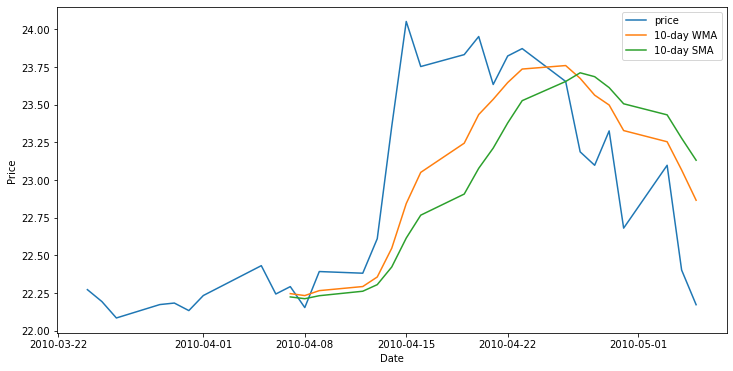

In [29]:
plt.figure(figsize = (12,6))
plt.plot(data['Price'], label = 'price')
plt.plot(wma10, label = '10-day WMA')
plt.plot(sma10, label = '10-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
## here WMA is better than the SMA